In [0]:
from sklearn.datasets import load_iris , load_wine
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB, CategoricalNB , MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics 
from sklearn import preprocessing
from sklearn import datasets
from sklearn.utils import shuffle
from pathlib import Path
from sklearn.utils import Bunch
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import ShuffleSplit

In [0]:
ROOT = Path("drive/My Drive/PWr/IMAD/Task 1")

In [0]:
def shuffle_data_set(data_set):
  df = pd.concat([pd.DataFrame(data_set.data), pd.DataFrame(data_set.target)], axis=1, ignore_index=True)
  df = df.sample(frac=1)
  X = df.loc[:, df.columns != df.columns[-1]]
  y = df.loc[:, df.columns[-1]]
  return Bunch(data=X,target=y)

In [0]:
def gauss_bayes_classifier(data_set,test_size=0.4,n_times=1):
  data_set = shuffle_data_set(data_set)
  X = data_set.data
  y = data_set.target 
  mean_accuracy = []
  mean_f_score = []
  for i in range(n_times):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 

    gnb = GaussianNB() 
    gnb.fit(X_train, y_train) 
      
    y_pred = gnb.predict(X_test) 
      
    mean_accuracy.append(metrics.accuracy_score(y_test, y_pred))
    mean_f_score.append(metrics.f1_score(y_test, y_pred, average='macro'))

  print("Gaussian Naive Bayes model accuracy(in %):", np.mean(mean_accuracy)*100)
  print("Gaussian Naive Bayes model f1_score(in %):", np.mean(mean_f_score)*100)

def multinomial_bayes_classifier(data_set,test_size=0.4):
  X = data_set.data 
  y = data_set.target 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1) 

  cnb = MultinomialNB() 
  cnb.fit(X_train, y_train) 
    
  y_pred = cnb.predict(X_test) 
    
  print("Multinominal Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
  print("Multinominal Naive Bayes model f1_score(in %):", metrics.f1_score(y_test, y_pred, average='macro')*100)

def categorical_bayes_classifier(data_set,test_size=0.4):
  X = data_set.data.to_numpy() 
  y = data_set.target
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1) 

  cnb = CategoricalNB() 
  cnb.fit(X_train, y_train) 
    
  y_pred = cnb.predict(X_test) 
    
  print("Categorical Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
  print("Categorical Naive Bayes model f1_score(in %):", metrics.f1_score(y_test, y_pred, average='macro')*100)

In [0]:
def cross_validation(data_set,NB,k_fold=5,test_size=0.3,n_times=1):
  data_set = shuffle_data_set(data_set)
  X = data_set.data
  y = data_set.target
  for i in range(n_times):
    scores = cross_val_score(NB, X, y, cv=k_fold)
    mean_accuracy.append(scores.mean())
    scores = cross_val_score(NB, X, y, cv=k_fold, scoring='f1_macro')
    mean_f_score.append(scores.mean())
 
  print( "Mean accuracy for %i cross validations: %0.2f" % (n_times, np.mean(mean_accuracy)) )
  print( "Mean f1 score for %i cross validations: %0.2f" % (n_times, np.mean(mean_f_score)) )


def stratified_cross_validation(data_set,n_splits=5,test_size=0.3,n_times=1):
  data_set = shuffle_data_set(data_set)
  X = data_set.data.values
  y = data_set.target.values
  mean_accuracy = []
  mean_f_score = []
  for i in range(n_times):
    skf = StratifiedKFold(n_splits=n_splits)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        gnb = GaussianNB() 
        gnb.fit(X_train, y_train) 
          
        y_pred = gnb.predict(X_test) 
          
        mean_accuracy.append(metrics.accuracy_score(y_test, y_pred))
        mean_f_score.append( metrics.f1_score(y_test, y_pred, average='macro'))
 
  print( "Mean accuracy for %i cross validations: %0.2f" % (n_times, np.mean(mean_accuracy)) )
  print( "Mean f1 score for %i cross validations: %0.2f" % (n_times, np.mean(mean_f_score)) )

In [23]:
# gauss_bayes_classifier(wine,0.2)
# gauss_bayes_classifier(glass,0.2)
# gauss_bayes_classifier(seeds,0.2)
test_size = 0.4
n_times = 10

# cross_validation(wine,GaussianNB(),5,test_size,n_times)
# cross_validation(wine,GaussianNB(),10, test_size,n_times)
# cross_validation(glass,GaussianNB(),5, test_size,n_times)
# cross_validation(glass,GaussianNB(),10, test_size,n_times)
# cross_validation(seeds,GaussianNB(),5, test_size,n_times)
# cross_validation(seeds,GaussianNB(),10, test_size,n_times)

stratified_cross_validation(wine,5,test_size,n_times)
stratified_cross_validation(wine,10, test_size,n_times)
stratified_cross_validation(glass,5, test_size,n_times)
stratified_cross_validation(glass,10, test_size,n_times)
stratified_cross_validation(seeds,5, test_size,n_times)
stratified_cross_validation(seeds,10, test_size,n_times)

Mean accuracy for 10 cross validations: 0.97
Mean f1 score for 10 cross validations: 0.97
Mean accuracy for 10 cross validations: 0.98
Mean f1 score for 10 cross validations: 0.98
Mean accuracy for 10 cross validations: 0.44
Mean f1 score for 10 cross validations: 0.47
Mean accuracy for 10 cross validations: 0.48
Mean f1 score for 10 cross validations: 0.44


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class

Mean accuracy for 10 cross validations: 0.90
Mean f1 score for 10 cross validations: 0.90
Mean accuracy for 10 cross validations: 0.90
Mean f1 score for 10 cross validations: 0.90


In [0]:
def load_glass():
  df = pd.read_csv(ROOT/'glass.csv')
  features = df.columns[:-1].tolist()
  X = df[features] 
  y = df['Type']
  return Bunch(data=X,target=y)

def load_seeds():
  df = pd.read_csv(ROOT/'seeds.csv',header=None)
  features = df.columns[:-1]
  target = df.columns[-1]
  X = df[features]
  y = df[target]
  return Bunch(data=X,target=y)

In [0]:
 iris = load_iris()
 wine = load_wine()
 glass = load_glass()
 seeds = load_seeds()

In [0]:
def digitize_wine(n_bins=10):
  df = pd.DataFrame(wine.data)
  for c in df.columns :
    minim = min(df[c])
    maxim = max(df[c])
    df[c] = np.digitize(df[c],np.linspace(minim,maxim,n_bins))
  wine_copy = load_wine()
  wine_copy.data = df
  return wine_copy

def digitize_glass_custom():
  df = glass.data.copy()
  print(np.mean(df['Mg']))
  print(np.mean(df['Ba']))
  print(np.mean(df['K']))

  mg_bins = [0,2.68,3.5,3.65,3.8,3.9,4]
  ba_bins = [0]+list(np.linspace(0.6,3.15,20))
  k_bins  = [0,0.03,0.49,0.6,0.8]
  df['Mg'] = np.digitize(np.array(df['Mg']),mg_bins)
  df['Ba'] = np.digitize(np.array(df['Ba']),ba_bins)
  df['K'] = np.digitize(np.array(df['K']), k_bins )

  glass_copy = load_glass()
  glass_copy.data = df
  return glass_copy

def digitize_all_features_glass(n_bins = 10):
    df = glass.data.copy()

    for c in df.columns:
      minim = min(df[c])
      maxim = max(df[c])
      df[c] = np.digitize(df[c],np.linspace(minim, maxim, n_bins))
   
    glass_copy = load_glass()
    glass_copy.data = df
    return glass_copy

def digitize_glass_log_custom(n_bins = 10):
    df = glass.data.copy()

    df['Fe'] = np.digitize(df['Fe'],np.geomspace(0.001, 0.6, n_bins))
    df['Ba'] = np.digitize(df['Ba'],np.geomspace(0.001, 3, n_bins))
    rest_columns = df.columns != df.columns[-1]

    glass_copy = load_glass()
    glass_copy.data = df
    return glass_copy

In [0]:
def draw_feature_distribution(data_set, n_columns=3, bins = None):
  X = data_set.data
  df = pd.DataFrame(X)
  n_rows = math.ceil(len(df.columns) / n_columns)
  f = plt.figure(figsize=(7*n_columns,3 * n_rows))
  for i, col in enumerate(df.columns.to_list(),1):
    f.add_subplot(n_rows,n_columns,i)
    sns.distplot(df[col],bins=bins)

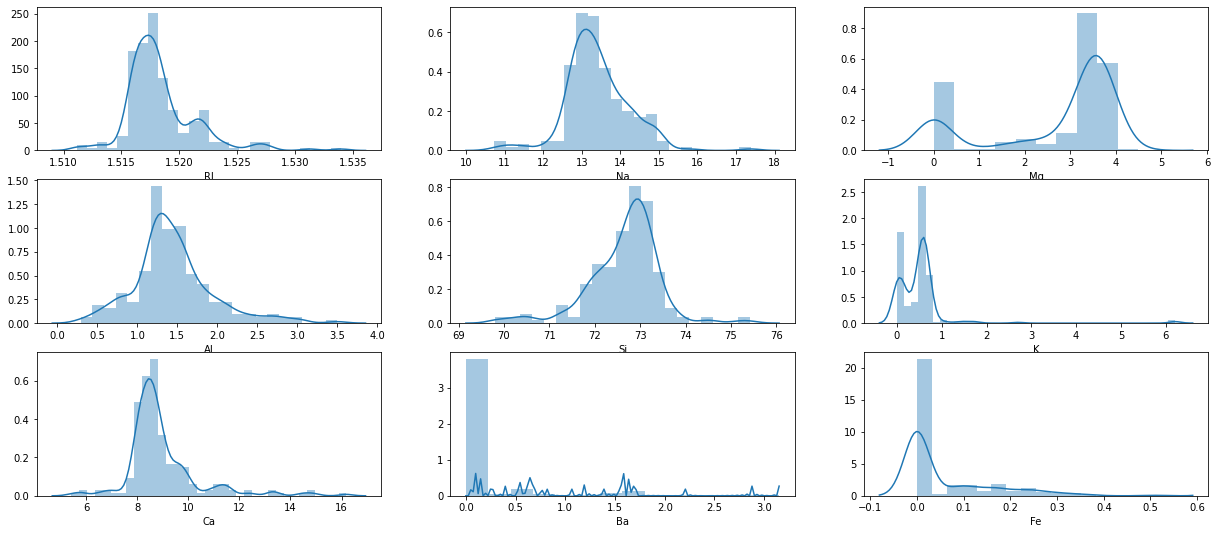

In [0]:
draw_feature_distribution(glass)

Gaussian Naive Bayes model accuracy(in %): 40.116279069767444
Gaussian Naive Bayes model f1_score(in %): 38.78132353105087


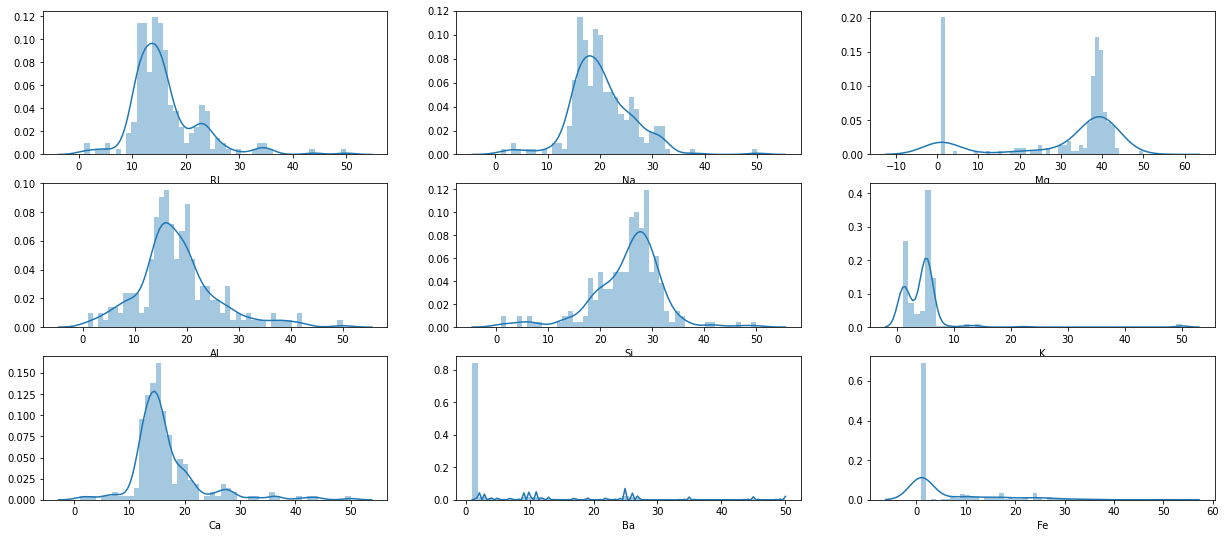

In [38]:
bins = 50
new_glass = digitize_all_features_glass(bins)
gauss_bayes_classifier(new_glass,0.4,10)
draw_feature_distribution(new_glass,bins=bins)

Gaussian Naive Bayes model accuracy(in %): 48.02325581395349
Gaussian Naive Bayes model f1_score(in %): 45.867220106289906


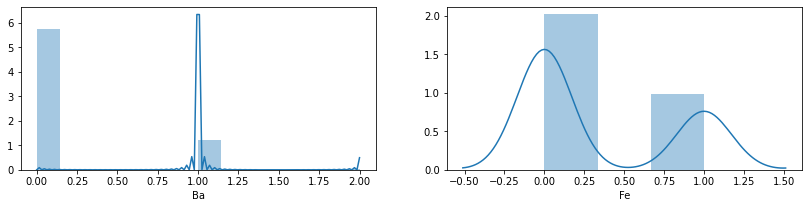

In [39]:
bins = 2
new_glass = digitize_glass_log_custom(bins)
gauss_bayes_classifier(new_glass,0.4,10)
df = pd.DataFrame(new_glass.data)
f = plt.figure(figsize=(14,3))
f.add_subplot(1,2,1)
sns.distplot(df['Ba'])
f.add_subplot(1,2,2)
sns.distplot(df['Fe'])

2.684532710280374
0.17504672897196263
0.49705607476635494
Gaussian Naive Bayes model accuracy(in %): 25.581395348837212
Gaussian Naive Bayes model f1_score(in %): 34.01416122004357
Gaussian Naive Bayes model accuracy(in %): 46.51162790697674
Gaussian Naive Bayes model f1_score(in %): 52.991452991452995


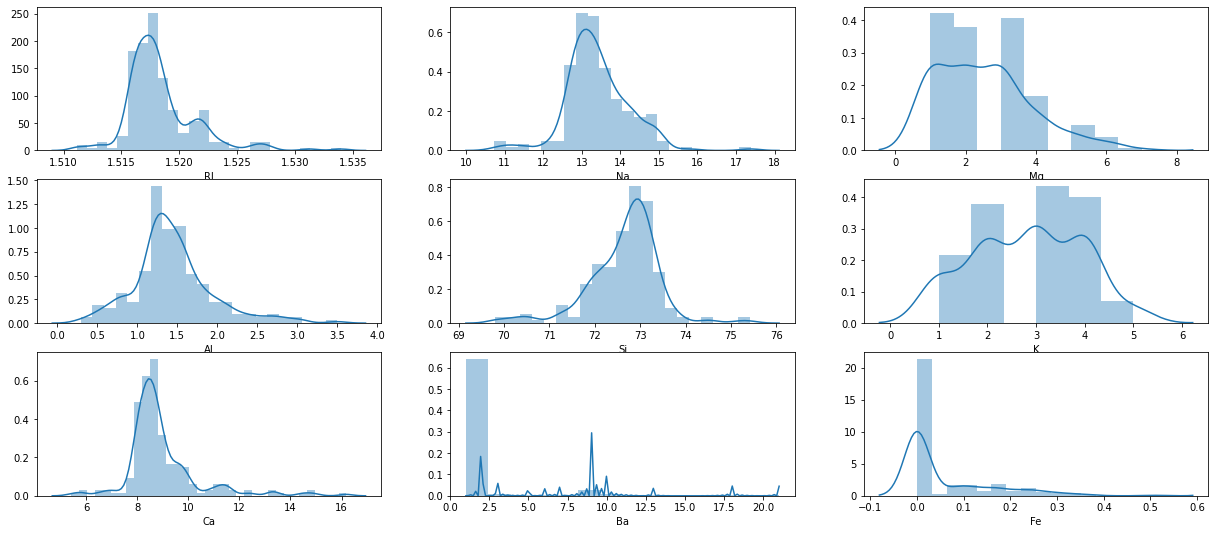

In [0]:
new_glass = digitize_glass_custom()
gauss_bayes_classifier(glass,0.2)
gauss_bayes_classifier(new_glass,0.2)
draw_feature_distribution(new_glass)

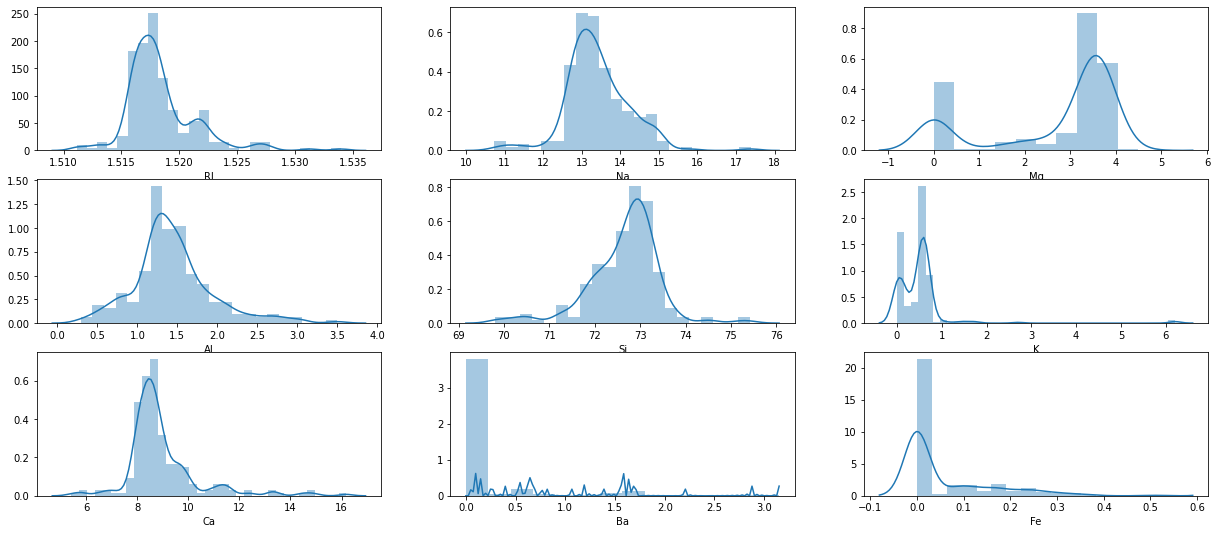

In [0]:
# draw_feature_distribution(iris,2)
# draw_feature_distribution(wine)
draw_feature_distribution(glass)
# draw_feature_distribution(seeds)

In [0]:
gauss_bayes_classifier(new_glass)

Gaussian Naive Bayes model accuracy(in %): 45.348837209302324
Gaussian Naive Bayes model f1_score(in %): 42.53341687552214


In [0]:
print(wine.data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
